In [1]:
import pandas as pd
#read in the data
data = pd.read_csv("house-votes-84 (1).data",sep = ",")
data.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [2]:
#to change "?" with -1
cleanup_nums = {"republican":     {"republican": 0, "democrat": 1}, "n": {"n": 0, "y": 1, "?": -1 }, "y":{"n":0,"y":1,"?":-1},
                "n.1": {"n": 0, "y": 1, "?": -1 },  "y.1":{"n":0,"y":1,"?":-1},"n.2": {"n": 0, "y": 1, "?": -1 },  "y.2":{"n":0,"y":1,"?":-1},
                "n.3": {"n": 0, "y": 1, "?": -1 },  "y.3":{"n":0,"y":1,"?":-1},"n.4": {"n": 0, "y": 1, "?": -1 },  "y.4":{"n":0,"y":1,"?":-1},"n.5": {"n": 0, "y": 1, "?": -1 },  "y.5":{"n":0,"y":1,"?":-1},"?": {"n": 0, "y": 1, "?": -1 },  "y.6":{"n":0,"y":1,"?":-1},"y.7": {"n": 0, "y": 1, "?": -1 },  "y.8":{"n":0,"y":1,"?":-1}
            }
cleanup_nums
#replacing
obj_df = data.replace(cleanup_nums)
obj_df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
1,1,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
2,1,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
3,1,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1
4,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [3]:

x=obj_df.drop(['republican'],axis=1)
x
y=obj_df['republican']
y

0      0
1      1
2      1
3      1
4      1
      ..
429    0
430    1
431    0
432    0
433    0
Name: republican, Length: 434, dtype: int64

### Split train by 25% and test 75%

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=100) # 25% training and 75% test
X_train, X_test, y_train, y_test


(     n  y  n.1  y.1  y.2  y.3  n.2  n.3  n.4  y.4  ?  y.5  y.6  y.7  n.5  y.8
 196  0 -1    1    1    1    1    0    0    0    1  0    0    0    1    0    1
 309  0  0    0    1    1    1    0    0    0    1  0    1    1    1    1    0
 341  0  1    1    0    1   -1    1    0    0    1  1    0    1    0    1    1
 391  1  1    0    1    1    1    0    0    0    0  1    1    1    1    0    1
 250  0  1    0    1    1    1    0    0    0    0  0    1    1    1    0    0
 ..  .. ..  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...  ...  ...  ...
 343  0  0    1    0    0    0    1    1    1    1  1    0    0    0    1    1
 359  1  0    1    0    0    1    1    1    1    1  0    0    1    0    0    1
 323  0  1    0    1    1    1    0    0    0    0  1    1    1    1    0    0
 280  1  0    1    1    1    1    1    1    0    0  0    0    0    1    0   -1
 8    1  1    1    0    0    0    1    1    1    0  0    0    0    0   -1   -1
 
 [108 rows x 16 columns],
      n  y  n.1  y.1  y.

## Rerun 3 times with random splits

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.75, random_state=1) # 25% training and 75% test
X_train1, X_test1, y_train1, y_test1


(     n  y  n.1  y.1  y.2  y.3  n.2  n.3  n.4  y.4  ?  y.5  y.6  y.7  n.5  y.8
 75   0  1    1    0    1    1    0    0    0    1  1    1    1    1    0   -1
 200  1  1    1    0    0    0    1    1    1    0  0    0    0    0    1    1
 77   1  1    1    0    1    1    0    0    0    1  1    0    1    1    0    1
 263  1  0    1    0    0    0    1    1    1    0  0    0    0    0    1   -1
 427 -1 -1   -1    0    0    0    1    1    1    1  0    0    1    0    1    1
 ..  .. ..  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...  ...  ...  ...
 255  0  0    0    1    1    0    0    0    0    0  0    1    0    1    0    0
 72   1  0    1    1    1    0    1    0    1    1  0    0    1    1    0    1
 396  1  1    0    0    1   -1    0    0    0    0  1    0    1    1    0    1
 235  0  0    1    0    0    0    1    1    1    0  0    0    0    0    1    1
 37   0  1    0    1    1    1    0    0    0    1  0    1    1    1    0    0
 
 [108 rows x 16 columns],
      n  y  n.1  y.1  y.

In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.75, random_state=1000) # 25% training and 75% test
X_train2, X_test2, y_train2, y_test2

(     n  y  n.1  y.1  y.2  y.3  n.2  n.3  n.4  y.4  ?  y.5  y.6  y.7  n.5  y.8
 77   1  1    1    0    1    1    0    0    0    1  1    0    1    1    0    1
 323  0  1    0    1    1    1    0    0    0    0  1    1    1    1    0    0
 72   1  0    1    1    1    0    1    0    1    1  0    0    1    1    0    1
 420  0  1    1    0    1    1    1    1    0    0  1    0    1    0    1    1
 375  1 -1    1    0    0    0    1    1    1    0  1    0    0    0    1    1
 ..  .. ..  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...  ...  ...  ...
 350  0  0    1    1    1    1    1    1    1    1  0    1    1    1    1    1
 251  1  1    1    0    0    1    1    1    1    0  0    0    0    0    1    1
 192  0  0    1    0    0    0    1    1    1    0  0    0    0    0    1    1
 71   1  1    1    0    0    0    1    1    1    0  1    0    0    0    1   -1
 87   0  1    1    0    1    1    1    0    1    1  1    0    1    1    0    1
 
 [108 rows x 16 columns],
      n  y  n.1  y.1  y.

In [7]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.75, random_state=10) # 25% training and 75% test
X_train3, X_test3, y_train3, y_test3

(     n  y  n.1  y.1  y.2  y.3  n.2  n.3  n.4  y.4  ?  y.5  y.6  y.7  n.5  y.8
 357  1  1    1    0    0    1    1    1    1    1  1    1    1    1    0   -1
 51   1  1    1    0    0    0    1    1    1    0  0    0    0    0   -1   -1
 14   0  1    0    1    1    1    0    0    0    1  0    1    1   -1    0   -1
 349  0  1    0    0    0    1    1    0    1    0  1    0    0    0    1    1
 272  0  0    0    1    1    0    1    1    0    1  0    1    1    1   -1    1
 ..  .. ..  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...  ...  ...  ...
 369  1  1    1    0   -1    1    1    1    0    1 -1   -1    0    0    1    1
 320  1  1    1    0    0    0    1    1    1    1  0    0    1    0    0    1
 15   1  0    1    0    0    1    0    1   -1    1  1    1   -1    0    0    1
 125  0 -1    0    1    1    1    0    0    0    0  0    1    1    1    0    0
 265  0  0    0    1    1    1    0    0    0    1  0    1    0    1    0    1
 
 [108 rows x 16 columns],
      n  y  n.1  y.1  y.

### function needed

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):

# Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [10]:
# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [12]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    out=accuracy_score(y_test,y_pred)*100
    print ("Accuracy : ",out)
    print("Report : ",
    classification_report(y_test, y_pred))
    return out

In [13]:
#creating trees for each experiements

In [14]:
    
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [15]:
    clf_entropy1 = train_using_entropy(X_train1, X_test1, y_train1)
    clf_entropy1

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [16]:
   clf_entropy2 = train_using_entropy(X_train2, X_test2, y_train2)
clf_entropy2

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [17]:
    clf_entropy3 = train_using_entropy(X_train3, X_test3, y_train3)
    clf_entropy3

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### Report the sizes and accursies of these trees in each experiement

In [18]:
  print("Results Using Entropy 25%:")
# Prediction using entropy

Results Using Entropy 25%:


In [19]:
y_pred_entropy = prediction(X_test, clf_entropy)
print(cal_accuracy(y_test, y_pred_entropy))

Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1]
Accuracy :  95.39877300613497
Report :                precision    recall  f1-score   support

           0       0.92      0.97      0.94       125
           1       0.98      0.95      0.96       201

    accuracy                           0.95       326
   macro avg       0.95      0.96      0.95       326
weighted

In [20]:
y_pred_entropy1 = prediction(X_test1, clf_entropy1)
print(cal_accuracy(y_test1, y_pred_entropy1))

Predicted values:
[1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0]
Accuracy :  95.70552147239265
Report :                precision    recall  f1-score   support

           0       0.92      0.98      0.95       129
           1       0.98      0.94      0.96       197

    accuracy                           0.96       326
   macro avg       0.95      0.96      0.96       326
weighted

In [21]:
y_pred_entropy2 = prediction(X_test2, clf_entropy2)
print(cal_accuracy(y_test2, y_pred_entropy2))

Predicted values:
[0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1]
Accuracy :  95.0920245398773
Report :                precision    recall  f1-score   support

           0       0.92      0.96      0.94       127
           1       0.97      0.94      0.96       199

    accuracy                           0.95       326
   macro avg       0.95      0.95      0.95       326
weighted 

In [22]:
y_pred_entropy3 = prediction(X_test3, clf_entropy3)
print(cal_accuracy(y_test3, y_pred_entropy3))

Predicted values:
[1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0]
Accuracy :  95.0920245398773
Report :                precision    recall  f1-score   support

           0       0.96      0.91      0.94       129
           1       0.95      0.97      0.96       197

    accuracy                           0.95       326
   macro avg       0.95      0.94      0.95       326
weighted 

### Measure impact of training set size on the  acc and the size of the learned tree (30%-70%)

In [23]:
#30%

In [47]:
#create list for storing the accuracies.
list2=[]

### Because of the high variance due to random splits repeat the experiment with five different random seeds for each training set size then report the mean, maximum and minimum accuracies at each training set size.

In [48]:
import numpy as np
import random

def score(x,y,test_quota):
    accuracy_list=[]
    for i in range(5):    #Since we have to try with five different values 
        rand_num = random.randint(1, 100)    # Generates random numbers between 1 , 100
        print(rand_num)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_quota, random_state=rand_num)
        clf_entropy = train_using_entropy(X_train, X_test, y_train)
        y_pred_entropy = prediction(X_test, clf_entropy)
        
        accuracy_list.append(cal_accuracy(y_test, y_pred_entropy))
        accuracy_np = np.array(accuracy_list)
        if(i==4):
            print(accuracy_list)
            print("MAX IS : ", max(accuracy_list))
            print("MIN IS :", min(accuracy_list))
            print("MEAN IS:", np.mean(accuracy_np))
            accuracy_list=[]
        

In [49]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(x, y, test_size=0.70, random_state=100) # 30% training and 70% test

In [50]:
clf_entropy30 = train_using_entropy(X_train30, X_test30, y_train30)
y_pred_entropy30 = prediction(X_test30, clf_entropy30)
#print(y_pred_entropy30.shape)
#print(y_test30.shape)
#print(y_train30.shape)
#print(cal_accuracy(y_test30, y_pred_entropy30))

list2.append(cal_accuracy(y_test30, y_pred_entropy30))

score(x,y, 0.70)

Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 1 1]
Accuracy :  95.39473684210526
Report :                precision    recall  f1-score   support

           0       0.92      0.97      0.94       116
           1       0.98      0.95      0.96       188

    accuracy                           0.95       304
   macro avg       0.95      0.96      0.95       304
weighted avg       0.96      0.95      0.95       30

In [51]:
#40%

In [52]:
X_train40, X_test40, y_train40, y_test40 = train_test_split(x, y, test_size=0.60, random_state=100) # 60% training and 40% test

In [53]:
clf_entropy40 = train_using_entropy(X_train40, X_test40, y_train40)
y_pred_entropy40 = prediction(X_test40, clf_entropy40)
print(cal_accuracy(y_test40, y_pred_entropy40))

list2.append(cal_accuracy(y_test40, y_pred_entropy40))


print("list2 is",list2)

score(x,y, 0.60)

Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 0]
Accuracy :  95.40229885057471
Report :                precision    recall  f1-score   support

           0       0.93      0.95      0.94       101
           1       0.97      0.96      0.96       160

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261

95.40229885057471
Accuracy :  95.40229885057471
Report :                precision   

In [54]:
#50%

In [55]:
X_train50, X_test50, y_train50, y_test50 = train_test_split(x, y, test_size=0.50, random_state=100) # 50% training and 50% test

In [56]:
clf_entropy50 = train_using_entropy(X_train50, X_test50, y_train50)
y_pred_entropy50 = prediction(X_test50, clf_entropy50)
print(cal_accuracy(y_test50, y_pred_entropy50))

list2.append(cal_accuracy(y_test50, y_pred_entropy50))

print("list2 is",list2)

score(x,y, 0.50)

Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1]
Accuracy :  95.39170506912443
Report :                precision    recall  f1-score   support

           0       0.93      0.95      0.94        82
           1       0.97      0.96      0.96       135

    accuracy                           0.95       217
   macro avg       0.95      0.95      0.95       217
weighted avg       0.95      0.95      0.95       217

95.39170506912443
Accuracy :  95.39170506912443
Report :                precision    recall  f1-score   support

           0       0.93      0.95      0.94        82
       

In [57]:
#60%

In [58]:
X_train60, X_test60, y_train60, y_test60 = train_test_split(x, y, test_size=0.40, random_state=100) # 60% training and 40% test

In [59]:
clf_entropy60 = train_using_entropy(X_train60, X_test60, y_train60)
y_pred_entropy60 = prediction(X_test60, clf_entropy60)
print(cal_accuracy(y_test60, y_pred_entropy60))

list2.append(cal_accuracy(y_test60, y_pred_entropy60))

print("list2 is",list2)

score(x,y, 0.40)

Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1]
Accuracy :  95.40229885057471
Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.97      0.95      0.96       104

    accuracy                           0.95       174
   macro avg       0.95      0.95      0.95       174
weighted avg       0.95      0.95      0.95       174

95.40229885057471
Accuracy :  95.40229885057471
Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.97      0.95      0.96       104

    accuracy                           

In [60]:
#70%

In [61]:
X_train70, X_test70, y_train70, y_test70 = train_test_split(x, y, test_size=0.30, random_state=100) # 70% training and 30% test

In [62]:
clf_entropy70 = train_using_entropy(X_train70, X_test70, y_train70)
y_pred_entropy70 = prediction(X_test70, clf_entropy70)
print(cal_accuracy(y_test70, y_pred_entropy70))

list2.append(cal_accuracy(y_test70, y_pred_entropy70))
print("list2 is",list2)


score(x,y, 0.30)

Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1]
Accuracy :  95.41984732824427
Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.97      0.95      0.96        78

    accuracy                           0.95       131
   macro avg       0.95      0.96      0.95       131
weighted avg       0.95      0.95      0.95       131

95.41984732824427
Accuracy :  95.41984732824427
Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.97      0.95      0.96        78

    accuracy                           0.95       131
   macro avg       0.95      0.96      0.95       131
weighted avg      

In [63]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt


[95.39473684210526, 95.40229885057471, 95.39170506912443, 95.40229885057471, 95.41984732824427]


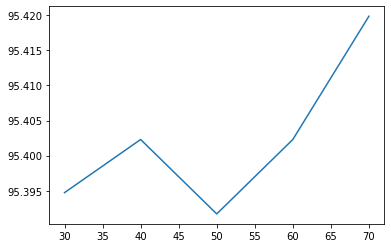

In [42]:
list1=[30,40,50,60,70]
print(list2)
plt.plot(list1,list2)

### Also measure the mean, max and min tree size. ● Start with training data size 40% , 50% .... Until you reach 80%.● Turn in two plots showing how accuracy varies with training set size and how the number of nodes in the final tree varies with training set size

In [166]:
import sklearn


import itertools
    
import statistics    



In [167]:
#clf_entropy60.tree_.max_depth
#cost_complexity_pruning_path(x, y,None)
#clf_entropy60.min_samples_split


#print(itertools.islice(clf_entropy40))

print ("when data size is 40% max", clf_entropy40.tree_.max_depth)
print ("when data size is 40% min", clf_entropy40.min_samples_split)

#min_samples_leaf

print ("when data size is 50% max", clf_entropy50.tree_.max_depth)
print ("when data size is 50% min", clf_entropy50.min_samples_split)


print ("when data size is 60% max", clf_entropy60.tree_.max_depth)
print ("when data size is 60% min", clf_entropy60.min_samples_split)


print ("when data size is 70% max", clf_entropy70.tree_.max_depth)
print ("when data size is 70% min", clf_entropy70.min_samples_split)



X_train80, X_test80, y_train80, y_test80 = train_test_split(x, y, test_size=0.20, random_state=100) # 80% training and 20% test
clf_entropy80 = train_using_entropy(X_train80, X_test80, y_train80)

y_pred_entropy80 = prediction(X_test80, clf_entropy80)

print ("when data size is 80% max", clf_entropy80.tree_.max_depth)
print ("when data size is 80% min", clf_entropy80.min_samples_split)

#print ("when data size is 50%", score(x,y, 0.50))
#print ("when data size is 60%", score(x,y, 0.60))
#print ("when data size is 70%", score(x,y, 0.70))
#print ("when data size is 80%", score(x,y, 0.80))
#max_leaf_node

when data size is 40% max 3
when data size is 40% min 2
when data size is 50% max 3
when data size is 50% min 2
when data size is 60% max 3
when data size is 60% min 2
when data size is 70% max 3
when data size is 70% min 2
Predicted values:
[0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1]
when data size is 80% max 3
when data size is 80% min 2


In [191]:

list_trees=[]
#clf_entropy40.get_depth()

list_trees.append(clf_entropy40.tree_.node_count)
list_trees.append(clf_entropy50.tree_.node_count)
list_trees.append(clf_entropy60.tree_.node_count)
list_trees.append(clf_entropy70.tree_.node_count)
list_trees.append(clf_entropy80.tree_.node_count)

print("list_trees is",list_trees)
print("max is",max(list_trees))
print("min is",min(list_trees))
print("mean is",statistics.mean(list_trees))

list_trees is [9, 11, 13, 13, 13]
max is 13
min is 9
mean is 11.8


In [158]:
listNodes=[]
listACC=[]
a=clf_entropy40.tree_.node_count
listNodes.append(a)

b=clf_entropy50.tree_.node_count
listNodes.append(b)


c=clf_entropy60.tree_.node_count
listNodes.append(c)

d=clf_entropy70.tree_.node_count
listNodes.append(d)

e=clf_entropy80.tree_.node_count
listNodes.append(e)

listNodes


[9, 11, 13, 13, 13]

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
s1 = accuracy_score(y_test40,y_pred_entropy40)
listACC.append(s1)
s2 = accuracy_score(y_test50,y_pred_entropy50)
listACC.append(s2)
s3 = accuracy_score(y_test60,y_pred_entropy60)
listACC.append(s3)
s4 = accuracy_score(y_test70,y_pred_entropy70)
listACC.append(s4)
s5 = accuracy_score(y_test80,y_pred_entropy80)
listACC.append(s5)

listACC

[0.9540229885057471,
 0.9539170506912442,
 0.9540229885057471,
 0.9541984732824428,
 0.9540229885057471]

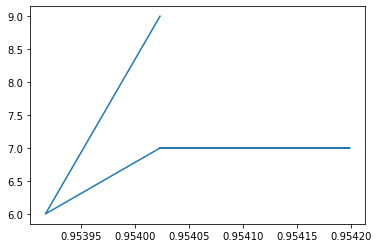

In [161]:
plt.plot(listACC,listLeaves)

###  Missing values and replace it by  ' _'


In [218]:
obj_df[obj_df.isnull().any(axis=1)]


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8


In [219]:
Copy = obj_df.select_dtypes(include=['int64']).copy()

Copy.replace({-1:"__"}, inplace=True)

print(Copy)

    republican   n   y n.1 y.1 y.2 y.3 n.2 n.3 n.4 y.4  ? y.5 y.6 y.7 n.5 y.8
0            0   0   1   0   1   1   1   0   0   0   0  0   1   1   1   0  __
1            1  __   1   1  __   1   1   0   0   0   0  1   0   1   1   0   0
2            1   0   1   1   0  __   1   0   0   0   0  1   0   1   0   0   1
3            1   1   1   1   0   1   1   0   0   0   0  1  __   1   1   1   1
4            1   0   1   1   0   1   1   0   0   0   0  0   0   1   1   1   1
..         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  .. ..  ..  ..  ..  ..  ..
429          0   0   0   1   1   1   1   0   0   1   1  0   1   1   1   0   1
430          1   0   0   1   0   0   0   1   1   1   1  0   0   0   0   0   1
431          0   0  __   0   1   1   1   0   0   0   0  1   1   1   1   0   1
432          0   0   0   0   1   1   1  __  __  __  __  0   1   1   1   0   1
433          0   0   1   0   1   1   1   0   0   0   1  0   1   1   1  __   0

[434 rows x 17 columns]


## Visualization

In [228]:
import graphviz
from sklearn import tree
# DOT data

clf_entropy = train_using_entropy(X_train, X_test, y_train)

dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=obj_df.columns,class_names=obj_df.iterrows()
 ,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ValueError: Length of feature_names, 17 does not match number of features, 16

In [72]:
pip install graphviz

|--- feature_3 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_10 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



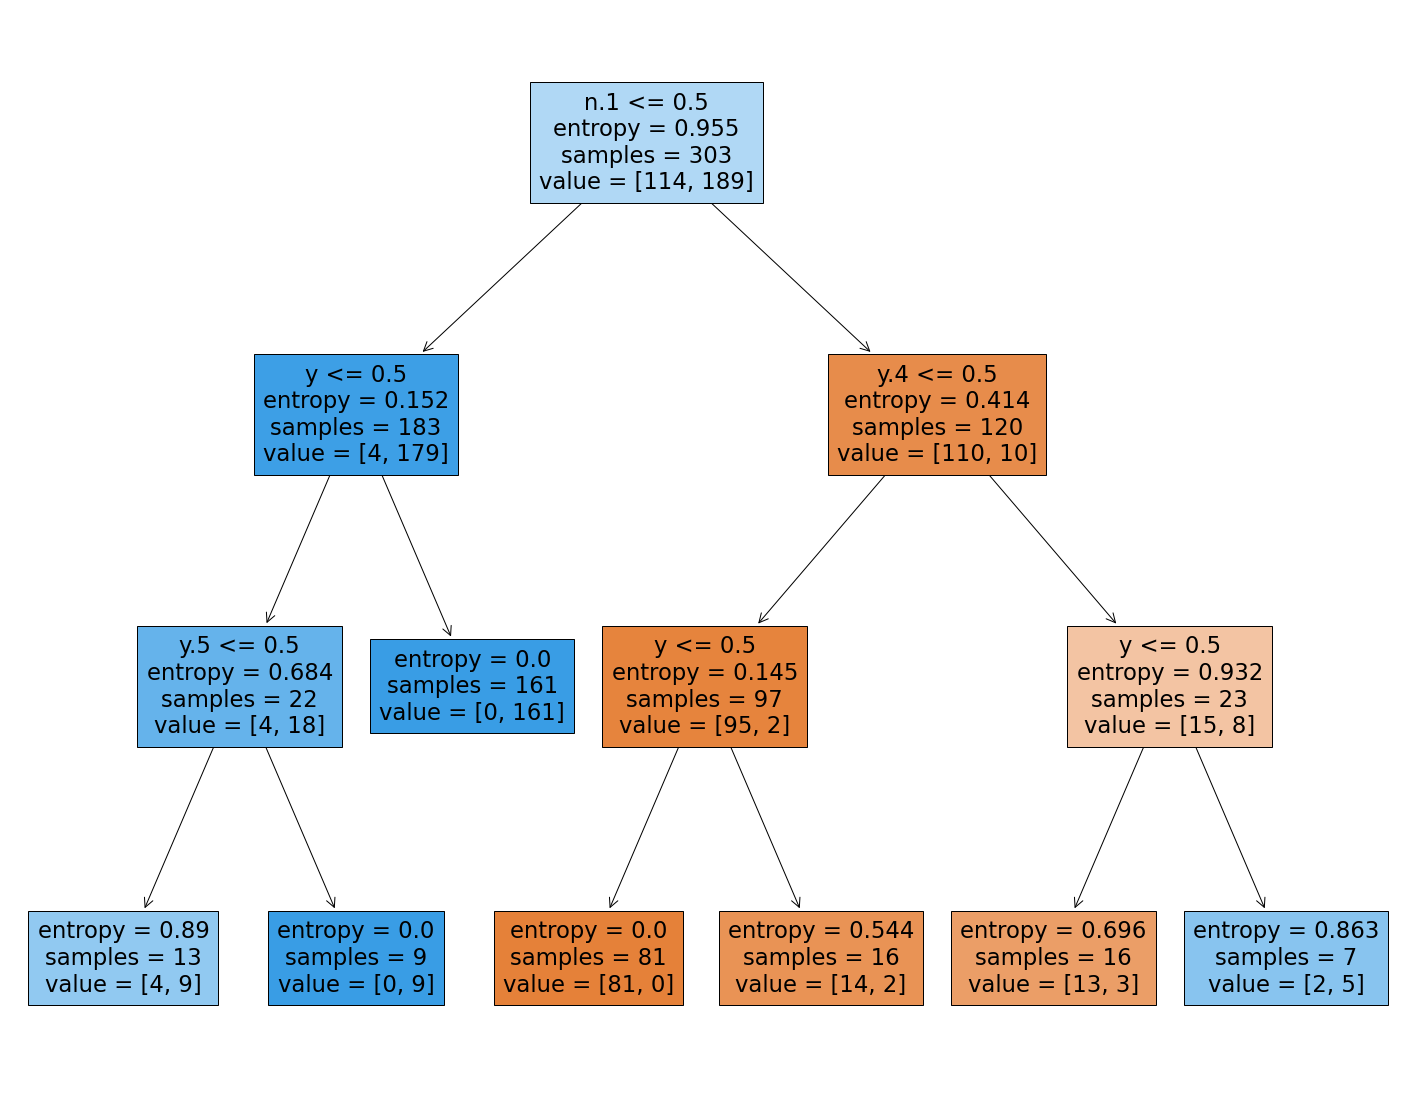

In [71]:
import graphviz
from sklearn import tree

clf_entropy70 = train_using_entropy(X_train70, X_test70, y_train70)

text_representation = tree.export_text(clf_entropy70)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

    
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy70, 
                   feature_names=obj_df.columns,
                   filled=True)

In [115]:
fig.savefig("decistion_tree_BEST.png")

SyntaxError: invalid syntax (<ipython-input-245-4488bbe460fd>, line 1)